In this notebook, I am going to explore a dataset on the job outcomes of students who graduated from college between 2010 and 2012. Th original data n the job outcomes was released by American Community Survey and cleaned by FiveThirtyEight https://github.com/fivethirtyeight/data/tree/master/college-majors

I will try to answer the following questions
What is the gender distribution on the top ten majors by the total number of graduates?
What are the top ten highest-paying majors and  which gender is the majority of these majors?
What are the ten lowest paying majors and which gender is the majority?
What is the gender distribution by major category 
 What is the unemployment rate per major category? and what are the top ten majors with the highest percentage of the unemployment rate?

more about the dataset in the readme file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data to a panda dataframe
grads = pd.read_csv("recent-grads.csv")

# Getting some information about the dataset
grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

21 columns mostly numeric and it seems that we have some missing values


In [2]:
#removing missin rows with missing  values.

grads = grads.dropna( axis=0)

In [3]:
# checking first five rows of the dataset
grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


------
I am going to check the gender distribution by top ten majors

In [4]:
# creating sub data frame for the top ten majors by total number of graduates 

top_ten_total = grads.sort_values(by="Total", ascending=False).copy()
topt_ten_total = top_ten_total[:10]


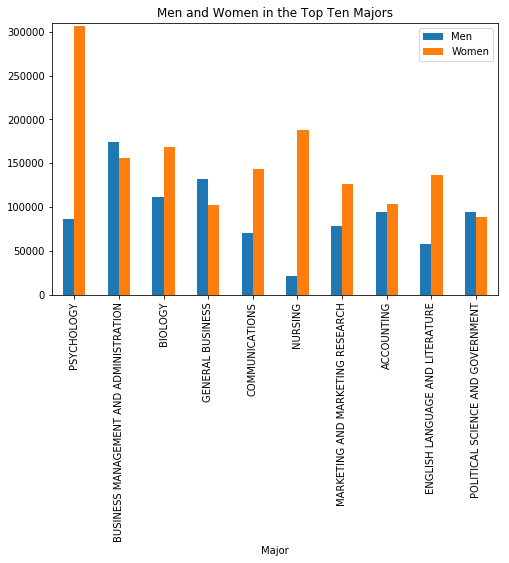

In [5]:
# plotting the data

topt_ten_total.plot.bar(x ="Major", y=["Men","Women"],figsize=(8,5),
                 title='Men and Women in the Top Ten Majors', ylim=(0, 310000))
plt.show()


We can see here that women are the majority on most of the top ten majors by the total of graduates


----

I am going to check the gender distribution by major category

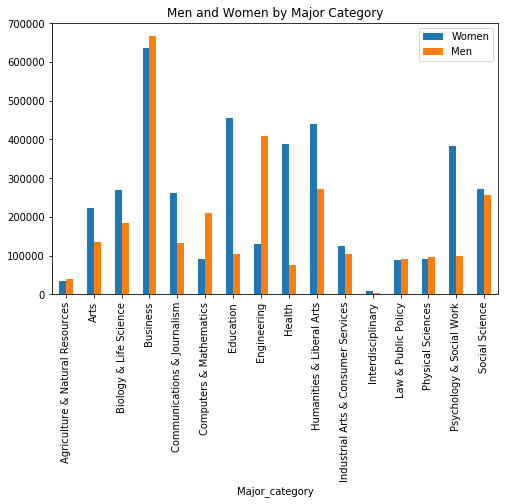

In [6]:
# Grouping the data by major category for women and men

grads2 = grads.groupby('Major_category')['Women','Men'].sum()

# plotting the data
grads2.plot.bar(figsize=(8,5),
                 title='Men and Women by Major Category')

I can see that women are the majority in most of the categories like Health, Education, Communications & Journalism, Psychology & Social Work, Arts and Social Science.
Men are the majority in a few like Engineering, Computers & Mathematics.


--------

I am going to check the top ten highest-paying jobs

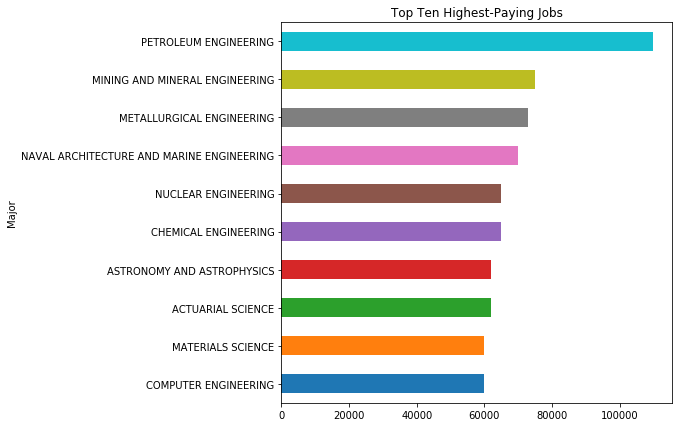

In [7]:
# Creating a sbu dataframe for the top ten highest paying jobs
top_ten_median = grads.sort_values(by="Median", ascending = False)
top_ten_median = top_ten_median[:10].sort_values(by="Median")

# Plotting data
top_ten_median.plot.barh(x ="Major", y="Median",figsize=(7,7),
                 title='Top Ten Highest-Paying Jobs', legend=False)
plt.show()

Checking the gender distribution on these jobs

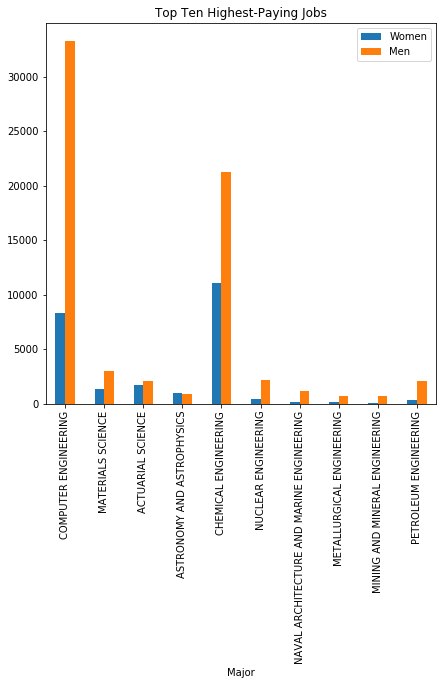

In [8]:
# Plotting data
top_ten_median.plot.bar(x ="Major", y=["Women","Men"],figsize=(7,7),
                 title='Top Ten Highest-Paying Jobs')
plt.show()

It seems that men are the majority.

-----
I am going to check the ten lowest paying jobs

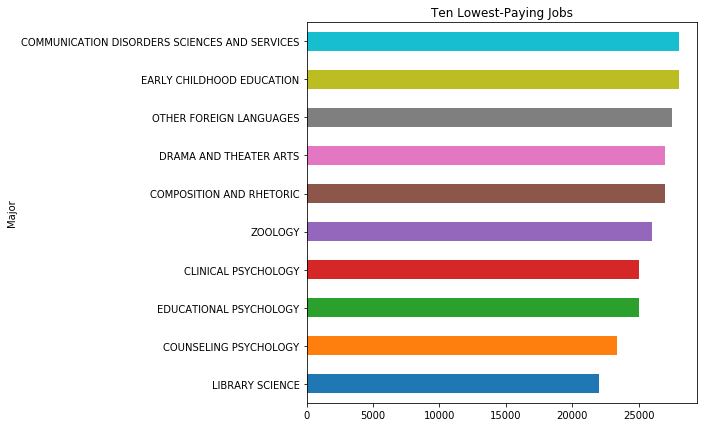

In [9]:
# Creating a sbu dataframe for the ten lowest paying jobs
lowest_ten_median = grads.sort_values(by="Median")
lowest_ten_median = lowest_ten_median[:10]

# Plotting data
lowest_ten_median.plot.barh(x ="Major", y="Median",figsize=(7,7),
                 title='Ten Lowest-Paying Jobs', legend=False)
plt.show()

Checking gender distribution for those jobs

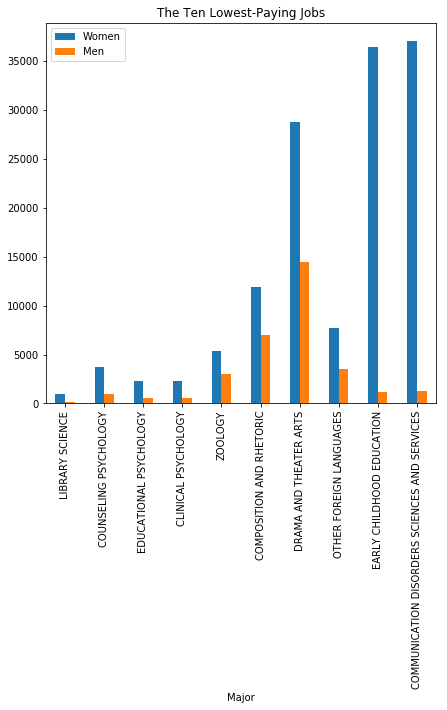

In [10]:
# Plotting data
lowest_ten_median.plot.bar(x ="Major", y=["Women","Men"],figsize=(7,7),
                 title='The Ten Lowest-Paying Jobs')
plt.show()

Women are the majority on the lowest paying jobs, intersting!

-------

My last analysis will be to check the unemployment rate per major category and the ten majors with the highest unemployment rate.

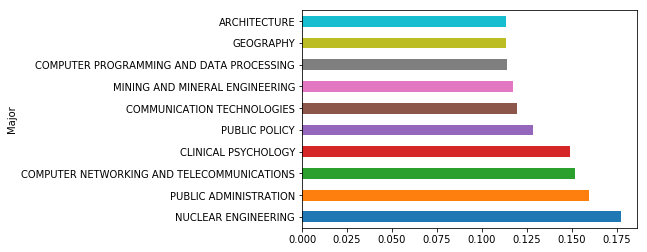

In [11]:
# Creating sub dataframe for the ten majors with the highest unemploymen rate

ten__lowest_unemp_rate = grads.sort_values("Unemployment_rate", ascending=False)
ten__lowest_unemp_rate = ten__lowest_unemp_rate[:10]

#Plotting data
ten__lowest_unemp_rate.plot.barh(x='Major', y="Unemployment_rate", legend=False)

It seems that Nuclear Engineering major has the highest unemployment rate.

-----

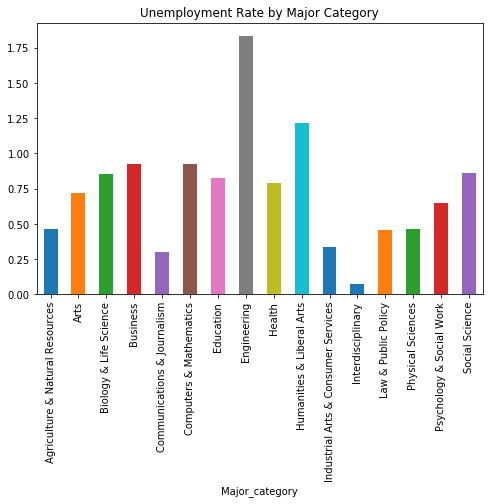

In [12]:
# Unemployment rate by major category

# Grouping the data by major category for Unemployment rate

unemp_group = grads.groupby('Major_category')["Unemployment_rate"].sum()

# plotting the data
unemp_group.plot.bar(figsize=(8,5), title='Unemployment Rate by Major Category')

Based on this dataset I found that :
women are the majority on most of the top ten majors by the total of graduates.
Women are the majority in most of the categories like Health, Education, Communications & Journalism, Psychology & Social Work, Arts and Social Science.
Men are the majority in a few like Engineering, Computers & Mathematics.
The highest paying major is Petroleum Engineering and men are the majority of the top ten highest paying majors.
The lowest paying major is Library Science and women are the majority of the lowest paying majors.
Nuclear Engineering has the highest unemployment rate.